Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the training set

In [ ]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Aiml project/Google_train_data.csv')

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


values' need the 2nd Column Opening Price as a Numpy array (not vector)

1:2' is used because the upper bound is ignored

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


**Feature Scaling**

Normalizing the Dataset

'MinMaxScalar' is a Normalization Library

In [ ]:
from sklearn.preprocessing import MinMaxScaler

'feature_range = (0,1)' 

makes sure that training data is scaled to have values between 0 and 1

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**Creating X_train and y_train Data Structures**

In [ ]:
X_train = []

In [ ]:
y_train = []

This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price

The wrong number of timesteps can lead to Overfitting or bogus results

In [ ]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


**Reshape the Data**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

Show the dataset we're working with

In [ ]:
display(dataset_train)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


**Building the RNN**

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Initialising the RNN**

Regression is when you predict a continuous value

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding a fourth LSTM layer and some Dropout regularisation This is the last LSTM Layer. 

'return_sequences = false' by default so we leave it out.

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the output layer 'units = 1' 

because Output layer has one dimension

In [ ]:
regressor.add(Dense(units = 1))

**Fitting the Model**

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 125ms/step - loss: 0.0427
Epoch 2/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0042
Epoch 13/100

**Making the predictions and visualising the results**

Extracting the Actual Stock Prices of Jan-2017

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Aiml project/Google_test_data.csv')
actual_stock_price = dataset_test.iloc[:, 1:2].values

**Preparing the Input for the Model**

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

 'reshape' function to get it into a NumPy format

In [ ]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Predict the Stock Price**

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

**Plotting the Actual and Predicted Prices for Google Stocks**

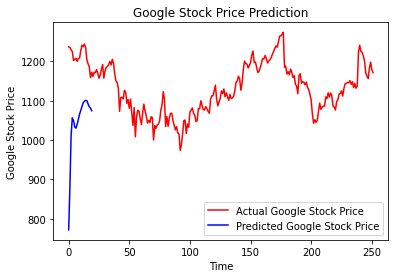

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()